<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

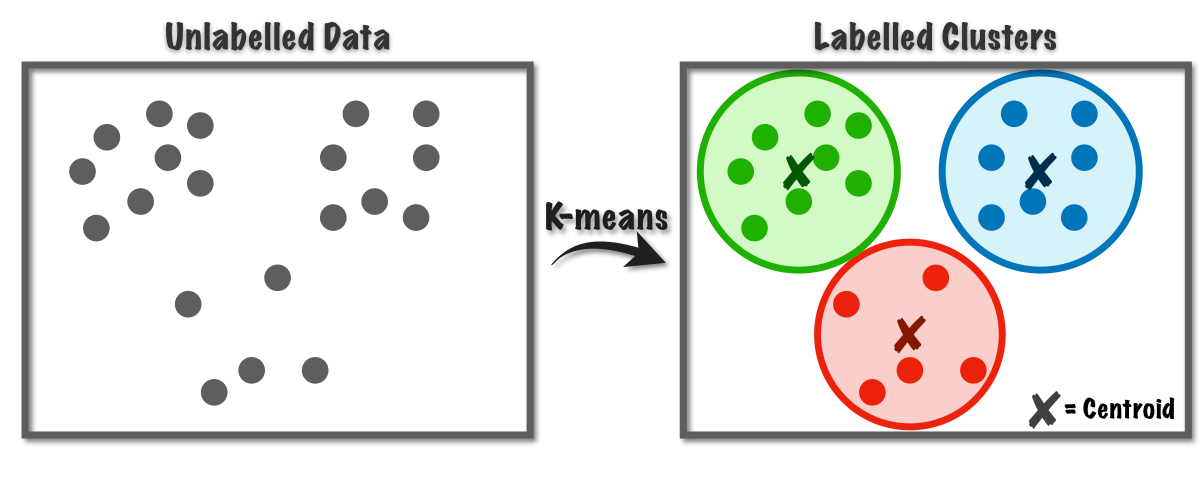

# ***K - Means Clustering with Python***

$ \ $

To begin with, we describe some questions:

$ \ $

$(1)$ How do brands always know which new products should recommend to me?

$(2)$ Can they read my mind?

$ \ $


The answers of both questions is due to some companies are able to group you with other customers that have similar characteristics, and they gathering information about you and your purchasing habits and using some machine learning tecniques, they can make some predictions.
For example, $\color{aquamarine}{\text{K - Means clustering}}$ is one such algorithm that can categorize similar people, therefore companies can determine this population's potential preferences and personalize your experience with the brand, which ranges from product recommendations to email marketing content.

$ \ $

In this notebook, you will learn the fundamentals of how to accomplish grouping with $\color{aquamarine}{\text{K - Means clustering}}$ and use it for segmenting mall customers and images.

$ \ $

---

## ***Objectives***

After completing this lab you will be able to:

- Explain the theory behind $\color{aquamarine}{\text{K - Means clustering}}$.

- Implement $\color{aquamarine}{\text{K - Means clustering}}$ to perform exploratory data analysis.

- Perform Image segmentation using $\color{aquamarine}{\text{K - Means clustering}}$.


$ \ $

----

## ***Setup***

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.


*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.


*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


$ \ $

---

## ***Installing Required Libraries***

$ \ $

The following required libraries are pre-installed in the Skills Network Labs environment.


In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

In [ ]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

----

## ***Introduction***

$ \ $

$\color{aquamarine}{\text{K - Means clustering}}$ is an unsupervised machine learning algorithm that organizes data into distinct groups based on certain similarities. The principle underlying the algorithm is simple to understand and is a great introduction to the potential of $\color{yellow}{\text{unsupervised learning algorithms}}$ for exploratory data analysis. In this lab, we will brush up on the basic theory underlying the algorithm and then go ahead and apply it ourselves to a real problem.

$ \ $

----

## ***About $K$ - Means Clustering***

$ \ $

|       Pros       |       Cons       |
| ---------------- | ------- |
| Easy to implement | Must manually chose $K$ |
| Always converges to local minimum | Not guaranteed to find global minimum |
| Scales well to large datasets | May not perform well on data of varying density |
| Generalizes to clusters of different shapes and sizes | Clusters are biased by outliers |


$ \ $

----

## ***How does K - Means Clustering work?***

$ \ $

The $\color{aquamarine}{\text{KMeans algorithm}}$ is quite simple and can be broken down into the following steps:

$ \ $

$(1)$ We specify the hyperparameter $k$, which refers to the number of clusters we want our data to be clustered into. Then $k$ centroids or cluster-means, are initialized at random.


$ \ $

$(2)$ The optimal centroid locations are found. This is done by the following algorithmic loop:

* Assignment step:  Assign each data point to the nearest centroid (calculated as the squared distance from the data point to centroid).

* Update step:  Recompute each centroid as the mean of the data points assigned to that cluster in the previous step.

$ \ $

$(3)$  We repeat the above step until the centroid locations remain unchanged. This tells us the algorithm has converged on a local optima and gives us the final cluster assignments for that run.
  

$ \ $

----

## ***Example (Visual intuition)***

$ \ $

Take a look at the following animation for some physical intuition of what's going on during each iteration. It shows several iterations of $\color{aquamarine}{\text{K - Means clustering}}$ (steps $3 \ \& \ 4$ in previous section) applied to a sample dataset with $k = 2$ clusters.


![img](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/KMeansClustering_example.gif)

In each iteration, you can see the previous locations of the centroids (faded - desteñido) and their current location after they were moved to the mean of the data points assigned to that cluster. The data points are colored by the cluster they are assigned to after that iteration.
Finally, on iteration $6$, we see the centroids of the clusters remain unchanged - this means the $\color{aquamarine}{\text{KMeans algorithm}}$ has converged and finished.


$ \ $

----

## ***Example (Segmenting Customer Data)***

$ \ $

While the theory and implementation of these algorithms are fascinating in their own right, as data scientists we're driven by the insights we can uncover and the stories we can tell with data. Now more than ever, companies are making data driven business decisions, in part thanks to the massive increase of data available, as well as the availability of computational power to process and make sense of the data. Customer segmentation is a process where customers are grouped together based on some common characteristics. For example, customers can be divided based on age, gender, income, marital status, and others. Segmenting customers in this way can have several applications for a business. For instance, common characteristics of the most profitable customers can be identified and a tailored marketing strategy can be implemented to target them.

$ \ $

Let's have a go at customer segmentation using the $\color{aquamarine}{\text{K - Means Clustering algorithm}}$.


$ \ $

-----

## ***Problem Statement***

$ \ $

Suppose you are a data scientist at MegaMind Sporting Goods Ltd. You've been tasked with segmenting customers into groups depending on their purchasing habits. Once you have this information, your colleague John will be able to generate clothing recommendations tailored for each customer group.

$ \ $

-----

## ***About the dataset***

$ \ $

We will explore a simple example of customer segmentation using the [Mall Customers](https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv) dataset. This is an artificial dataset that contains data on customers of a shopping mall.


$ \ $

----

## ***Loading the dataset***

$ \ $

$(1)$ We download the dataset and read it into a Pandas dataframe.

In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/CustomerData.csv', index_col=0)

$ \ $

$(2)$ Let's take a peek at our dataset to ensure it was loaded properly.

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


$ \ $

----

## ***Getting familiar with the data***

$ \ $

First, let's take a look at the data we have to gain a better general understanding of it before we attempt any clustering.

$ \ $

$(1)$ Let's start by looking at the distributions of some of the features.

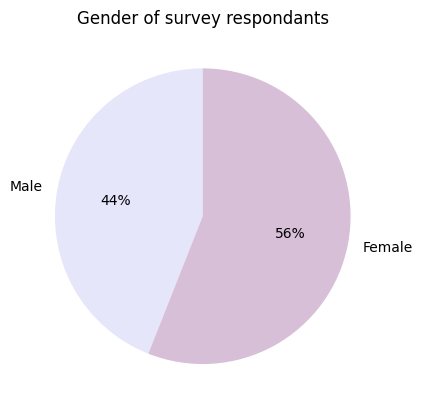

In [ ]:
# describimos una mascara que describa los renglones del data frame que contienen solo hombres
mask_male = (df['Gender'] == 'Male')

# mostramos el numero de renglones del dataframe que solo tiene hombres
num_male = df[mask_male].shape[0]

# describimos una mascara que describa los renglones del data frame que contienen solo mujeres
mask_female = (df['Gender'] == 'Female')

# mostramos el numero de renglones del dataframe que solo tiene mujeres
num_female = df[mask_female].shape[0]

# describimos un grafico de torta que muestre una comparativa entre el numero de hombres y mujeres
plt.pie([num_male, num_female],
         labels = ['Male', 'Female'],
         startangle = 90,
         autopct = '%1.f%%',
         colors = ['lavender', 'thistle'])

# describimos el titulo del grafico
plt.title('Gender of survey respondants')

# mostramos en pantalla nuestra imagen creada
plt.show()

We see that we have slightly more female respondents in our survey.

$ \ $

$(2)$  Next, let's plot histograms of the age and annual incomes of the customers.

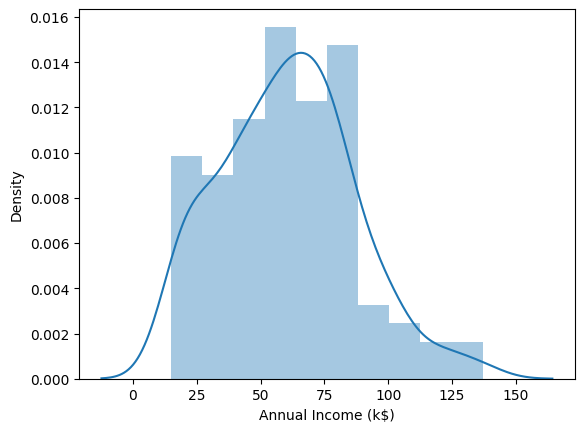

In [ ]:
sns.distplot(df['Annual Income (k$)'], bins = 10, kde = True);

Our distribution appears slightly skewed to the right. Not as many people are making over $100k$ per year.

$ \ $

$(3)$ Let's take a look at people's annual income vs. spending score:

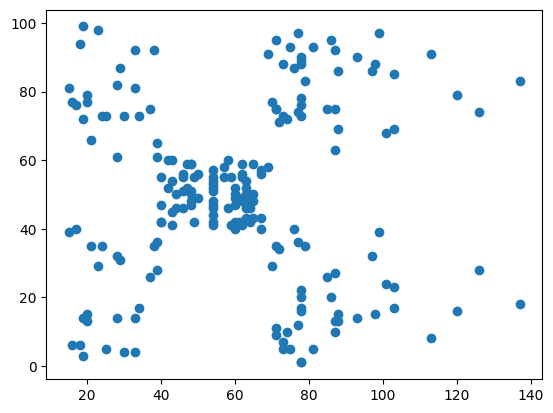

In [ ]:
# creamos un grafico de dispersion que muestra la relacion pedida
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
plt.scatter(x, y);

This looks promising, we can see our customers seem to fall into ~5 categories:

$ \ $

$(1)$ Low income, high spending.

$ \ $

$(2)$ High income, low spending.

$ \ $

$(3)$ Low income, low spending.

$ \ $

$(4)$ High income, low spending.

$ \ $

$(5)$ Medium income, medium spending.

$ \ $

If we manage to segment our existing customers into these 5 categories, we will obtain exactly the information John requires.

$ \ $

-----

## ***Clustering the data using K Means***

$ \ $

Let's start clustering our data. To do so, we simply load the ***sklearn.cluster.KMeans*** object - with our desired number of clusters $k = 5$.

In [ ]:
# creamos un objeto K - Means con 5 clusters
km = KMeans(n_clusters = 5, random_state = 42)

# describimos el subdataframe X
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# entrenamos el modelo K - means con el dataframe X
km.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
km.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
0 == km.labels_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,

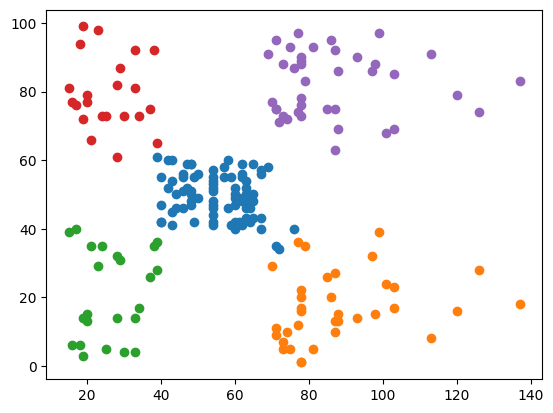

In [ ]:
# realizamos una iteracion sobre la lista de numeros [0, 1, 2, 3, 4] = valores de las etiquetas de km
for label in np.unique(km.labels_):

    # creamos una mascara que muestre en que caso el dataframe  tiene etiqueta = label
    mascara = (label == km.labels_)

    # creamos un nuevo dataframe con la mascara anterior
    X_ = X[mascara]

    # realizamos un grafico de dispersion con el subdataframe X_ mostrando la relacion entre sus columnas
    x = X_['Annual Income (k$)']
    y = X_['Spending Score (1-100)']
    plt.scatter(x, y, label = label)

# mostramos el plot en pantalla
plt.show()

Awesome! Our KMeans algorithm was able to correctly group our data into the $5$ categories that we initially noticed

$ \ $

----

## ***Example (Image Segmentation)***

$ \ $

***Image segmentation*** is the process of locating objects and boundaries in an image.  Various clustering can be used for this task.

How is this done?:

$(\checkmark)$  We cluster pixels using their brightness (grayscale) or ***RGB*** values (color).

$(\checkmark)$ We replace each pixel with the average brightness or ***RGB*** value of pixels in their cluster.


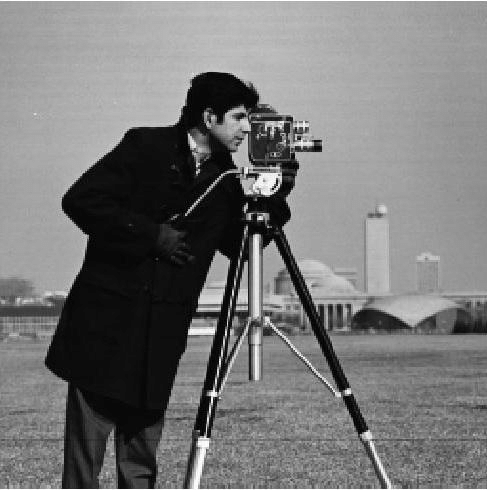

In [ ]:
# describimos la url de la imagen
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/cameraman.png'

# esta funcion obtiene el contenido de la url
response = requests.get(url)

# Image.open abre e identifica el archivo de imagen dado
# BytesIO es una clase en el módulo 'Io' de Python que proporciona una interfaz similar a un archivo para flujos de bytes en memoria
img = Image.open(BytesIO(response.content))

# mostramos la imagen en pantalla
img

In [ ]:
# convertimos nuestra imagen en un array
img = np.array(img)

# describimos nuestro array con tamaño mx1, donde m es el numero de renglones
X = img.reshape(-1, 1)

# creamos un objeto de tipo KMean con 2 clusters
km = KMeans(n_clusters = 2, random_state = 42)

# entrenamos nuestro modelo
km.fit(X)

KMeans(n_clusters=2, random_state=42)

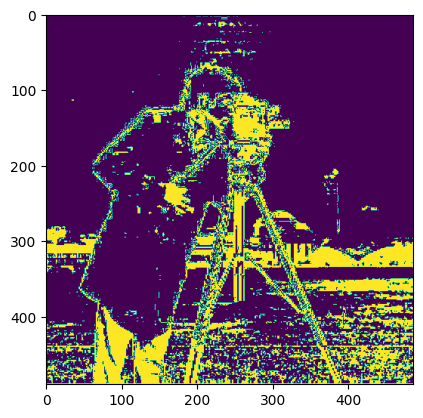

In [ ]:
# creamos una matriz de ceros con el mismo tamaño que X
seg = np.zeros(X.shape)

# realizamos una iteracion sobre la lista [0, 1]
for i in [0, 1]:

    # segmentamos las etiquetas
    seg[km.labels_ == i] = (km.cluster_centers_[i])

# establecemos el tamaño de la segmentacion anterior
seg = seg.reshape(img.shape)

# mostramos la imagen en pantalla
plt.imshow(seg);

Awesome! Even as humans, we can still easily recognize our image after segmentation with $k = 2$ colors.

$ \ $

-----

## ***Exercise***

$ \ $

$(1)$ Let's load the data for this image.

In [ ]:
# describimos la url de la imagen
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/kingfisher.jpeg'

$ \ $

$(2)$ Using the function ***Image.open***, display the respective image given in the ***url***.

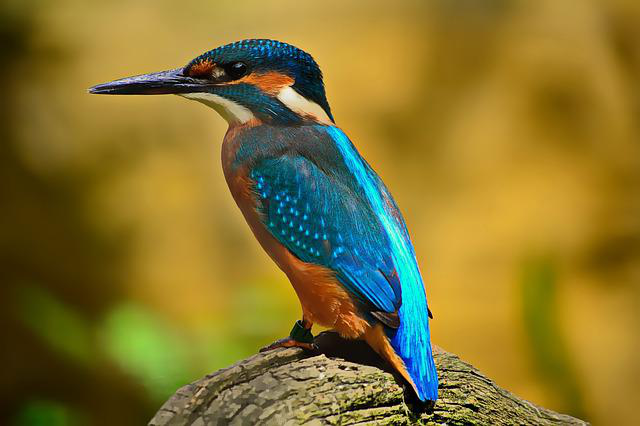

In [ ]:
# esta funcion obtiene el contenido de la url
response = requests.get(url)

# Image.open abre e identifica el archivo de imagen dado
# BytesIO es una clase en el módulo 'Io' de Python que proporciona una interfaz similar a un archivo para flujos de bytes en memoria
img = Image.open(BytesIO(response.content))

# mostramos la imagen en pantalla
img

$ \ $

$(3)$ We take our image and we give it as an array.

In [ ]:
# convertimos nuestra imagen en un array
img = np.array(img)

# describimos nuestro array con tamaño mx3, donde m es el numero de renglones
X = img.reshape(-1, 3)

$ \ $

$(4)$ Let's create a ***KMeans*** object with $k=2$. Later train the model with the $X$ data.

In [ ]:
# creamos un objeto de tipo KMean con 2 clusters
km = KMeans(n_clusters = 2, random_state = 42)

# entrenamos nuestro modelo KMeans
km.fit(X)

KMeans(n_clusters=2, random_state=42)

$ \ $

$(5)$ Using our ***KMean*** model, we segment our image.

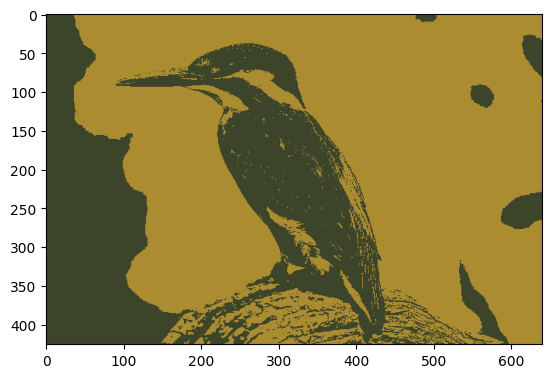

In [ ]:
# creamos una matriz nula del mismo tamaño de X
seg = np.zeros(X.shape)

# realizamos una iteracion sobre la lista [0,1]
for i in [0,1]:

    # realizamos una segmentacion de las etiquetas
    seg[km.labels_ == i] = km.cluster_centers_[i]

# describimos el tamaño de la segmentacion
seg = seg.reshape(img.shape).astype(int)

# mostramos la imagen e pantalla
plt.imshow(seg);

$ \ $

----

## ***Exercise***

$ \ $

Repeat the previous exercise using $k=4$.

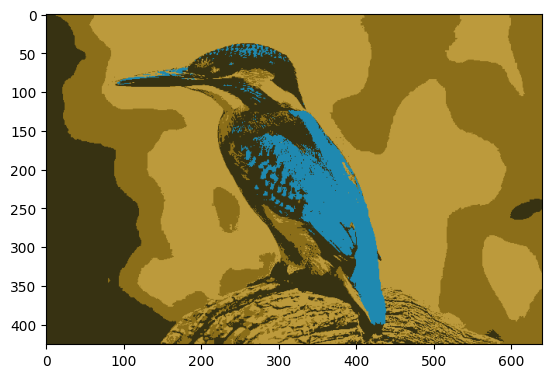

In [ ]:
# describimos nuestro array con tamaño mx3, donde m es el numero de renglones
X = img.reshape(-1, 3)

# creamos un objeto de tipo KMean con 2 clusters
km = KMeans(n_clusters = 4, random_state = 42)

# entrenamos nuestro modelo
km.fit(X)

# creamos una matriz nula del mismo tamaño que X
seg = np.zeros(X.shape)

# realizamos una iteracion sobre la lista [0, 1, 2, 3]
for i in [0, 1, 2, 3]:

    # realizamos una segmentacion de las etiquetas
    seg[km.labels_ == i] = km.cluster_centers_[i]

# describimos el tamaño de la segmentacion
seg = seg.reshape(img.shape).astype(int)

# mostramos la imagen e pantalla
plt.imshow(seg);